In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import zipfile 
from PIL import Image,ImageOps

In [ ]:
zip = zipfile.ZipFile('archive.zip')
zip.extractall()

In [14]:
from tensorflow.keras.models import Sequential # creating DLL structure model
from tensorflow.keras.layers import Conv2D# using 2 dimensional convolution filter
from tensorflow.keras.layers import MaxPooling2D# using 2-D max pooling filters
from tensorflow.keras.layers import Flatten# used for flattening the result array/image
from tensorflow.keras.layers import Dense# used for creating/declaring neurons
from tensorflow.keras.preprocessing.image import ImageDataGenerator# importing function

In [28]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape = (64,64,3),activation = 'relu'))# defining 2-D convolution filter
model.add(MaxPooling2D(pool_size=(2,2)))# defining 2-D maxpooling filter
model.add(Flatten())# flattening result
model.add(Dense(units=2500,activation='relu'))# structuring input model of ANN
model.add(Dense(units=1,activation='sigmoid'))#structuring ouytput model of ANN
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])# optimising model
# preprocessing image in dataset
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
val_datagen=ImageDataGenerator(rescale=1./255)# testing dataset
#accesing the images in the dataset via sub folders train,val
training_set=train_datagen.flow_from_directory('/content/xray_dataset_covid19/train',target_size=(64,64),batch_size=10,class_mode='binary')
val_set=val_datagen.flow_from_directory('/content/xray_dataset_covid19/valid',target_size=(64,64),batch_size=10,class_mode='binary')
history=model.fit(training_set,steps_per_epoch=15,epochs=5,validation_data=val_set,validation_steps=2)
# saving the model
model.save('Covid-19.h5')

Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/5
15/15 [==============================] - 14s 860ms/step - loss: 4.7456 - accuracy: 0.5987 - val_loss: 0.2852 - val_accuracy: 0.9000
Epoch 2/5
15/15 [==============================] - 13s 828ms/step - loss: 0.4367 - accuracy: 0.8157 - val_loss: 0.2984 - val_accuracy: 0.8500
Epoch 3/5
15/15 [==============================] - 13s 829ms/step - loss: 0.4055 - accuracy: 0.7882 - val_loss: 0.0728 - val_accuracy: 1.0000
Epoch 4/5
15/15 [==============================] - 13s 865ms/step - loss: 0.3509 - accuracy: 0.8070 - val_loss: 0.2241 - val_accuracy: 0.8500
Epoch 5/5
15/15 [==============================] - 13s 833ms/step - loss: 0.2559 - accuracy: 0.9127 - val_loss: 0.0935 - val_accuracy: 1.0000


Saved Model & Graph to disk


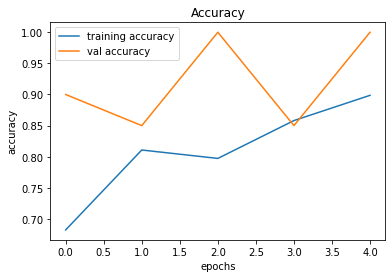

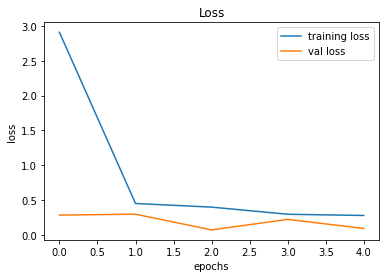

In [29]:
#plotting the values
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.savefig('Accuracy.png')

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.savefig('Loss.png')
print("Saved Model & Graph to disk")


In [36]:
zip = zipfile.ZipFile('Test.zip')
zip.extractall()

In [37]:
from tensorflow.keras.models import model_from_json # used to import model
from tensorflow.keras.models import load_model
import numpy as np
import sys
from tensorflow.keras.preprocessing import image# used for preproccesing

In [38]:
model=load_model('Covid-19.h5')
print("loaded model from disk")

loaded model from disk


In [41]:
#classification of images
def classify(img_file):
    img_name=img_file
    test_image=image.load_img(img_name,target_size=(64,64))
    test_image=image.img_to_array(test_image)
    test_image=np.expand_dims(test_image,axis=0)
    result=model.predict(test_image)

    if result[0][0]==1:
        prediction='Pneumonia'
        print("\n In this{0}the result is{1}!".format(img_name,prediction))    
    else:
        prediction='Normal'
        print("\n In this{0}the result is{1}!".format(img_name,prediction))



In [46]:
    
#storing the images in this folder
path='/content/Test'
files=[]
# r=root,d=directories,f=files
for r,d,f in os.walk(path):
  for file in f:
        if '.jpeg' or '.jpg' or '.png' or '.JPEG' in file:
            files.append(os.path.join(r,file))
for f in files:
  classify(f)


 In this/content/Test/8.jpegthe result isPneumonia!

 In this/content/Test/2.jpegthe result isPneumonia!

 In this/content/Test/4.jpegthe result isPneumonia!

 In this/content/Test/9.jpegthe result isNormal!

 In this/content/Test/7.jpegthe result isNormal!

 In this/content/Test/5.jpegthe result isNormal!

 In this/content/Test/1.jpegthe result isNormal!

 In this/content/Test/3.jpegthe result isNormal!

 In this/content/Test/10.jpegthe result isNormal!

 In this/content/Test/6.jpegthe result isPneumonia!
